In [6]:
import sys
sys.path.append('C:/Users/nerpa\Dropbox (Personal)\Research\discrete_sr\code\python\SPIDER_discrete')

import numpy as np
from process_library_terms import gaussian_kernel_estimate

# Generate fake data
np.random.seed(0)
n = 2**13
points = np.random.normal(size=(n, 2))
weights = np.random.normal(size=(n,))
resolution = 128
xx, yy = np.mgrid[0:resolution, 0:resolution] - resolution // 2
xi = np.vstack([(xx / resolution).ravel(), (yy / resolution).ravel()]).T
sigma = 1/np.sqrt(n)

In [15]:
# coarse grain the data
inv_cov = np.diag(2 * [1 / sigma ** 2])
coarse_grained_data = gaussian_kernel_estimate["double"](points, weights[:, None], xi, inv_cov, float)
coarse_grained_data = np.reshape(coarse_grained_data, (128, 128))

840529.5037435


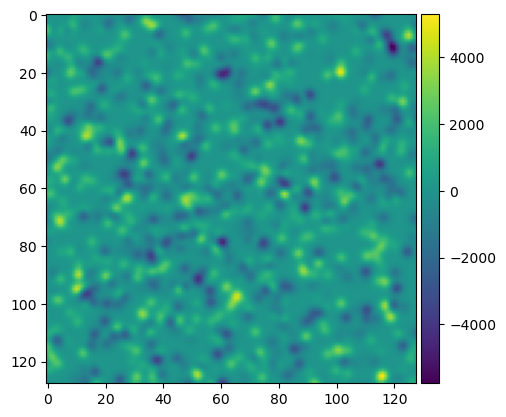

In [17]:
### plot strong-form fields

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

print((coarse_grained_data**2).mean())
fig, ax = plt.subplots(1, 1)
im = ax.imshow(coarse_grained_data)
#colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(im, cax=cax)

plt.show()